# Intro to Data Visualisation with Python

At Whitehat our data is plentiful - too plentiful in fact.

Trying to grasp over arching trends, connections or problems simply from looking at the raw data is an exercise in futility. Sometimes it is useful to use various statistical measures and KPIs to interrogate the data - but designing these already necessitates a deeper understanding of the data.

This understanding usually comes from visualisations. Parts of the organisation currently use Graphana or Tableau, which certainly have their place (they are particularly useful for people who don't have experience programming). However, since we will likely be doing most of our data analysis within Python it makes the most sense to take advantage of Python's extensive visualisation options.

What follows should be interpreted as a 'primer' more than a 'guide'. The points should be fairly high level and serve mostly as examples for what you potentially can do with relative ease - and point in the direction of more complex options when needed.

This primer is also more technically oriented. In particular I won't be going too deeply into why you should use particular visualisations over another, instead reserving those ideas (as well as what makes a 'good' visualisation) for future posts.

With those caveats in mind, lets get started!

## Tools of the trade

Within Python we have plentiful options available to us when it comes to visualising data - what follows are the options I use, but this should not be treated as a mandate that you *have* to use these.

### Pandas
I'm not going to explain what pandas is or how it works - you should have a good grasp of that before delving into this article (likewise for numpy). However it's worth noting that pandas has some built in visualisation options.

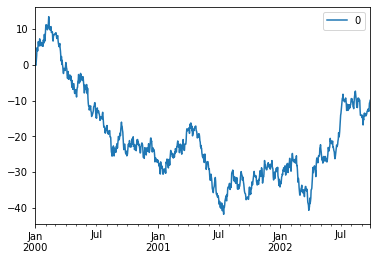

In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000)).cumsum()

df.plot();

df.plot() is how you access the basic plotting functionality. A wide variety of plots can be accessed by using df.plot.<bar/scatter/pie/etc>(), for example:

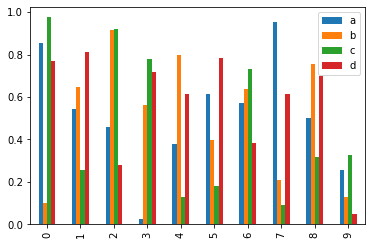

In [2]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])

df2.plot.bar();

There are generally a number of options that can be passed to these functions. Both generic ones such as color, and more specific ones like stacked.

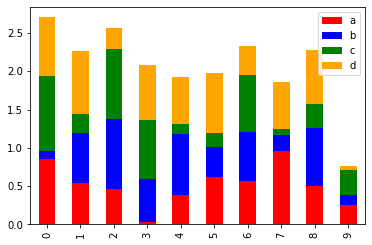

In [3]:
df2.plot.bar(stacked = True, color = {'a':'red', 'b':'blue', 'c':'green', 'd':'orange'});

There are two exceptions to this standard plotting api; boxplot and hist can be accessed directly as df.boxplot() and df.hist() - although they can also be accessed as df.plot.hist() and df.plot.boxplot() if you really want to.

In [4]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris =  pd.read_csv(csv_url, names = col_names)

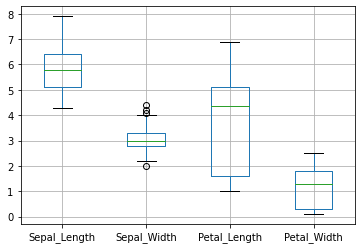

In [5]:
iris.boxplot();

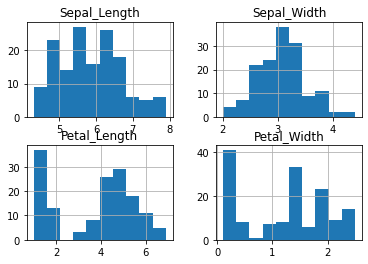

In [6]:
iris.hist();

The charts are not always the nicest you could make - and whilst there are lots of options to play with, the real flexibility comes from the underlying matplotlib functionality. However, my main point here is pointing out just how much you can do within pandas without even using a fully featured visualisation library.

For more details on how this works see [https://pandas.pydata.org/docs/user_guide/visualization.html](Pandas Chart Visualisation).

### Matplotlib

Matplotlib is the underlying technology that powers a lot of other graphing options in Python - including the Pandas plotting functions as mentioned above.

It comes with a number of basic plotting options and almost infinite customisation. This is not always a good thing. For example, if anyone can give me an example for when a [https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html](3D scatter chart) is ever a good idea I will be genuinely shocked. In fact, the gallery in general goes back and forth between extraordinarily clever and mind-bogglingly pointless.

In practice, I would avoid using Matplotlib directly. But it is important to be familiar with it since it is used when customising pandas/seaborn charts.

For example, consider the following histogram:

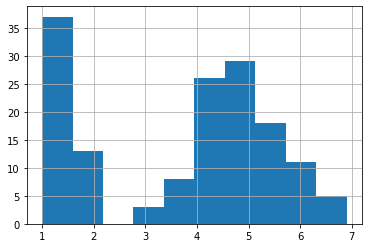

In [7]:
iris['Petal_Length'].hist();

You quickly notice to distinct peaks and decide you want to color them. You could trawl through the documentation for .hist() in pandas but you won't find anything. However the task is not impossible.

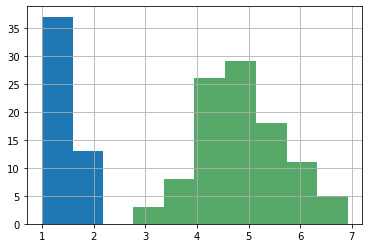

In [8]:
ax = iris['Petal_Length'].hist()

for rect in ax.patches:
    if rect.get_x() >= 2.5:
        rect.set_color('#55a868')

This is the point at which I'm probably meant to explain what is going on here. But honestly I figured this out the way most people figure out how to do things in matplotlib - I googled it.

In principle what is happening is that the .hist() method returns a matplotlib Axes object. We can then access the 'patches' (think coloured shapes) that make up the plot. Since these are all rectangles they have the .get_x() method which we use to check their location, then .set_colour() to change that attribute.

The point here is not to teach you a cool trick in matplotlib, but to emphasise a deeper point. *Everything* in matplotlib can be accessed in some way and updated or changed.

For example, I can make the data float:

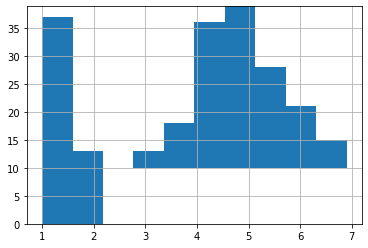

In [9]:
ax = iris['Petal_Length'].hist()

for rect in ax.patches:
    if rect.get_x() >= 2.5:
        rect.set_y(10)

This serves absolutely no practical purpose I am aware of, *but I can still do it*. I could even change the x-values, or the heights of certain bars. I can even add extra patches:

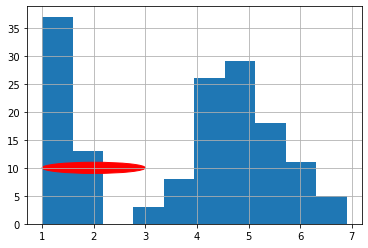

In [10]:
import matplotlib.pyplot as plt

ax = iris['Petal_Length'].hist()

circle = plt.Circle((2,10), 1, color='red')

ax.add_patch(circle);

(If you want a challenge, you can figure out how to write a function that always adds something that looks like a circle, regardless of how the axes are scaled.)

The conclusion here is that if you want to do something to a chart based on matplotlib you can almost certainly do it; but I make guarantees as to how simple or intuitive the answer will be.

### Seaborn

The seaborn library is one of many libraries designed to make matplotlib more accessible and easier to use.

It is very good at doing this. We'll plot the same histogram as before, but now with seaborn:

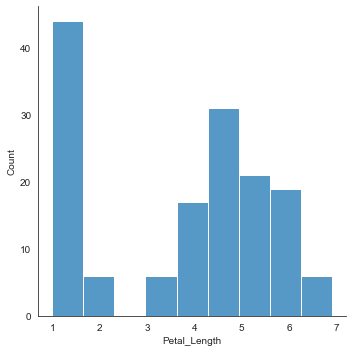

In [11]:
import seaborn as sns

sns.set_style("white")

sns.displot(data=iris, x='Petal_Length');

This already looks a little nicer, but a big advantage is some of the incredibly useful built in functionality of seaborn.

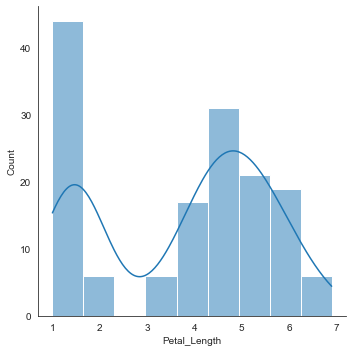

In [12]:
sns.displot(data=iris, x='Petal_Length', kde=True);

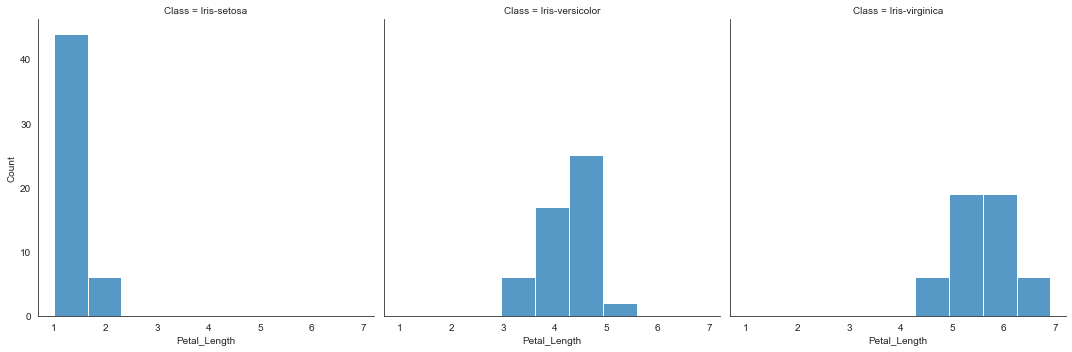

In [13]:
sns.displot(data=iris, x='Petal_Length', col='Class');

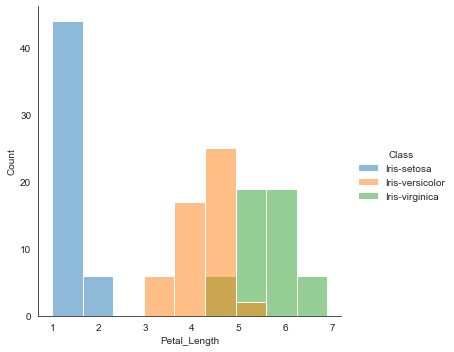

In [14]:
sns.displot(data=iris, x='Petal_Length', hue='Class');

With a data set like iris, we can even use the incredible pairplot() functionality to represent multiple different relationships at once.

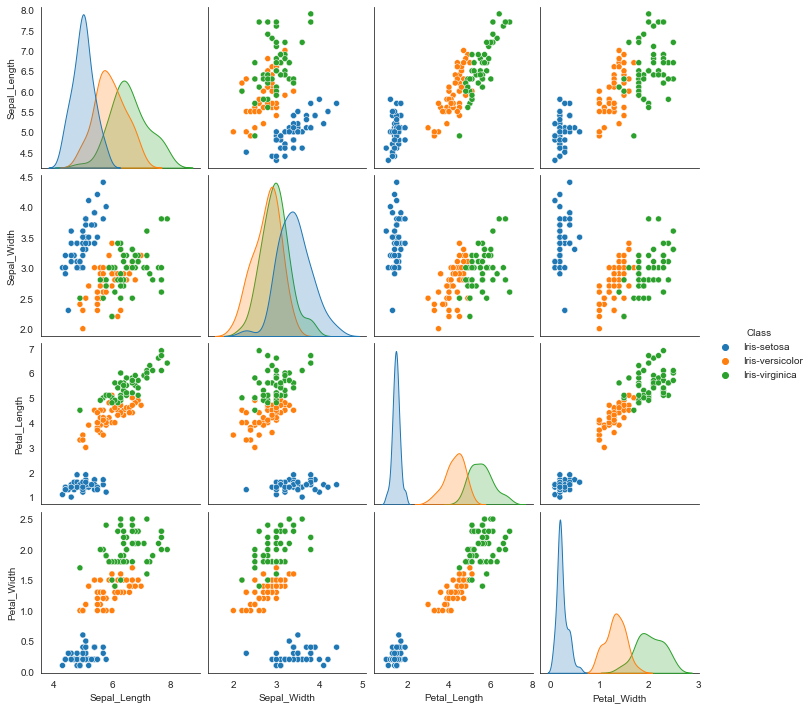

In [15]:
sns.pairplot(data=iris, hue='Class');

Seaborn even allows us to easily customise the graphic. This is all stuff we could do with matplotlib but it would generally not be worth the effort.

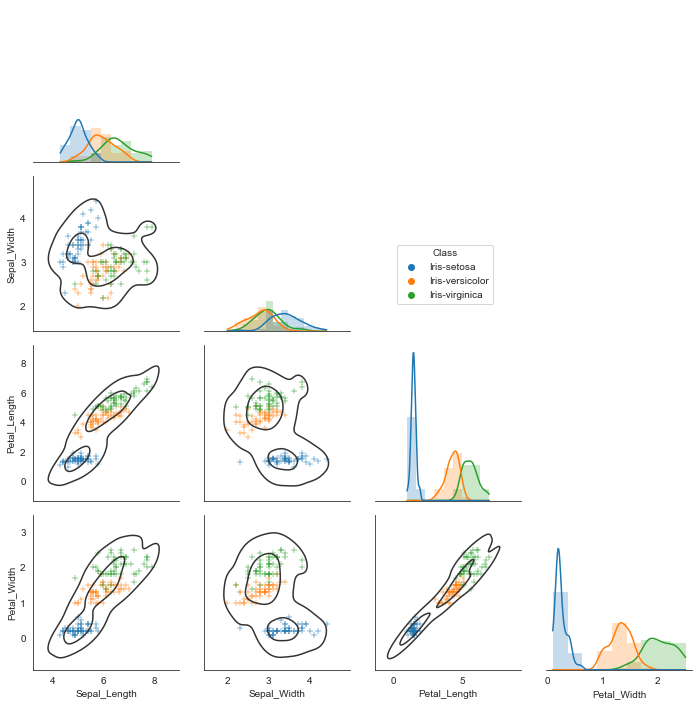

In [16]:
g = sns.PairGrid(iris, hue="Class", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=3, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61,.6))

At its core this is the power that seaborn provides - it's basic function calls come with lots of useful presets making it painless to get reasonably nice looking charts with deep insights prepared very quickly. Then when it comes time to tidy up charts and make them more presentable, seaborn also makes that is painless as possible too!

The [https://seaborn.pydata.org/index.html](Seaborn documentation) is very good, and I highly recommend looking at it if you want ideas and examples.

### Altair

A recommendation from Bolster that I haven't fully explored yet. From what I've seen so far it is not as easy to use as seaborn, but makes up for this with more sophistication when it comes to complex charts. In particular, it offers efficient data transformation and (more importantly) built in interactivity - a feature not available at all in seaborn.

At this its worth mentioning that Altair is not actually built on matplotlib, but vega. Whilst a lot of the underlying ideas are very similar, the syntax is not. Hence why it's able to offer some additional functionality.

For now, I haven't explored it so this section will need expanded upon eventually.

### Plotly

One of the main

In [20]:
import plotly.express as px
import jupyter_dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

# Load Data
df = px.data.tips()
# Build App
app = jupyter_dash.JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )
# Run app and display result inline in the notebook
app.run_server(mode='inline', host='localhost', port='8087')